In [1]:
from keras import Input, Model
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
x_train = mnist.train.images

In [0]:
input_size = 784
hidden_size = 128
code_size = 32

In [0]:
input_img = Input(shape=(input_size,))

hidden1 = Dense(hidden_size, activation='relu')(input_img)

code = Dense(code_size, activation='relu')(hidden1)

hidden2 = Dense(hidden_size, activation='relu')(code)

output_img = Dense(input_size, activation='sigmoid')(hidden2)

In [7]:
autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
55000/55000 [==============================] - 10s 189us/step - loss: 0.1420
Epoch 2/5
55000/55000 [==============================] - 10s 178us/step - loss: 0.1018
Epoch 3/5
55000/55000 [==============================] - 10s 177us/step - loss: 0.0953
Epoch 4/5
 6080/55000 [==>...........................] - ETA: 8s - loss: 0.0935

55000/55000 [==============================] - 10s 178us/step - loss: 0.0925
Epoch 5/5
55000/55000 [==============================] - 10s 178us/step - loss: 0.0907


In [0]:
x_test = mnist.test.images

In [0]:
reconstructed = autoencoder.predict(x_test)

In [0]:
source = x_test[0].reshape((28,28))
result = reconstructed[0].reshape((28,28))

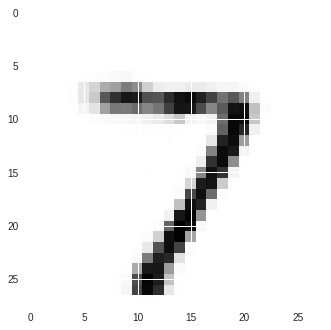

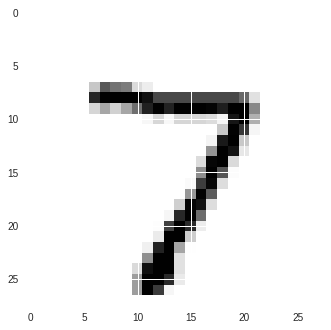

In [18]:
import matplotlib.pyplot as plt

plt.imshow(result)
plt.show()
plt.imshow(source)
plt.show()

In [19]:
x_train.shape

(55000, 784)

## Denoising autoencoder

In [0]:
import numpy as np

In [0]:
x_train_noisy = x_train + np.random.normal(scale=0.1, size=x_train.shape)

x_test_noisy = x_test + np.random.normal(scale=0.1, size=x_test.shape)

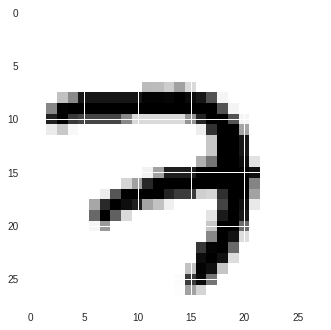

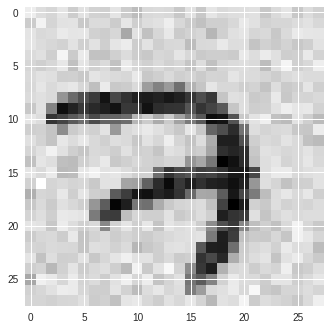

In [30]:
plt.imshow(x_train[0].reshape((28,28)))
plt.show()
plt.imshow(x_train_noisy[0].reshape((28,28)))
plt.show()

In [31]:
d_autoencoder = autoencoder

d_autoencoder.fit(x_train_noisy, x_train, epochs=5)

Epoch 1/5
55000/55000 [==============================] - 10s 175us/step - loss: 0.0929
Epoch 2/5
55000/55000 [==============================] - 10s 179us/step - loss: 0.0914
Epoch 3/5
55000/55000 [==============================] - 10s 182us/step - loss: 0.0906
Epoch 4/5
 3456/55000 [>.............................] - ETA: 9s - loss: 0.0897

55000/55000 [==============================] - 10s 180us/step - loss: 0.0900
Epoch 5/5
55000/55000 [==============================] - 10s 179us/step - loss: 0.0895


In [0]:
d_reconstructed = d_autoencoder.predict(x_test_noisy)

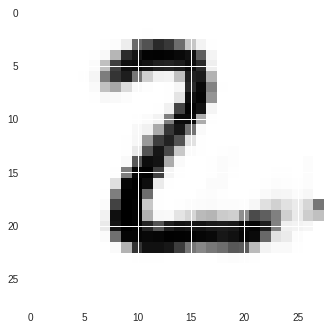

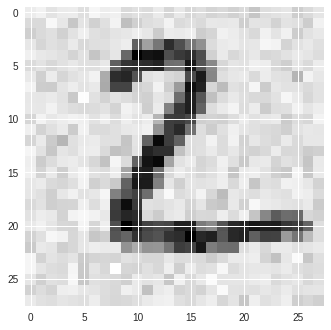

In [37]:
plt.imshow(d_reconstructed[1].reshape((28,28)))
plt.show()
plt.imshow(x_test_noisy[1].reshape((28,28)))
plt.show()